# Explore here

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings # To ignore warnings 
warnings.filterwarnings('ignore')
from colorama import Fore


In [88]:
total_data = pd.read_csv("../data/raw/Aquifer_Petrignano.csv")
total_data.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [89]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [90]:
total_data.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [91]:
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (5223, 8)
Dimensions after dropping duplicates: (5223, 8)


In [92]:
# Drop NA rows
total_data = total_data[total_data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

# Remove columns that are not useful
total_data = total_data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [93]:
# Simplify column names

total_data.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in total_data.columns if feature not in targets]
total_data.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [94]:
# Reconstructing the data set into a time series

total_data['date'] = pd.to_datetime(total_data['date'], format = '%d/%m/%Y')
total_data.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})


,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


Explanation of the features remaining in the ds:

Rainfall                 indicates the quantity of rain falling (mm)
Temperature              indicates the temperature (°C)
Volume                   indicates the volume of water taken from the drinking water treatment plant (m^3)
Hydrometry               indicates the groundwater level (m)

Target:         

Depth to Groundwater     indicates the groundwater level (m from the ground floor)

NameError: name 'date' is not defined

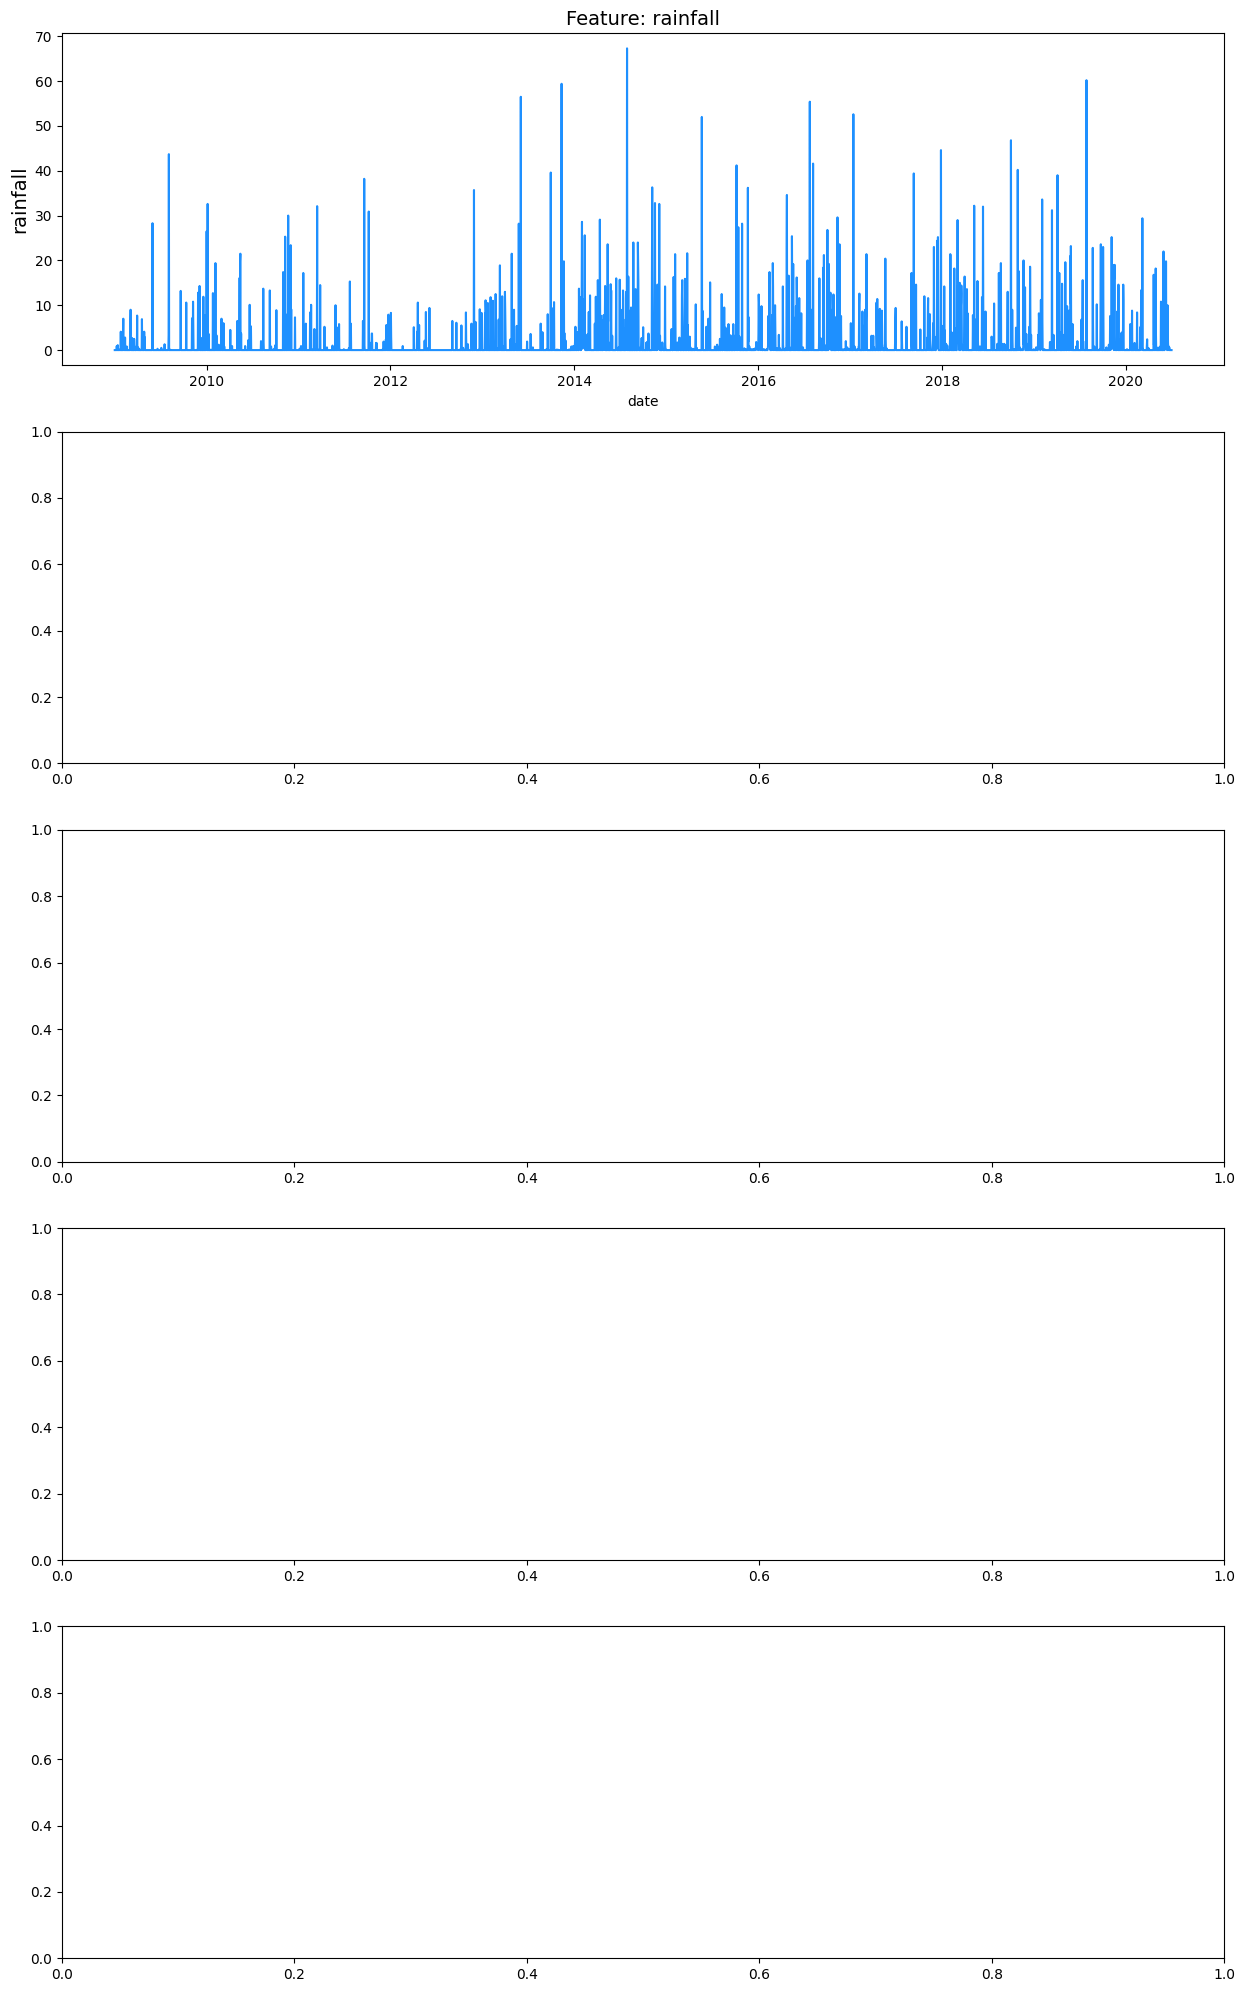

In [95]:
# Plotting rainfall

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(total_data.drop('date', axis=1).columns):
    sns.lineplot(x=total_data['date'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)]) 

NameError: name 'date' is not defined

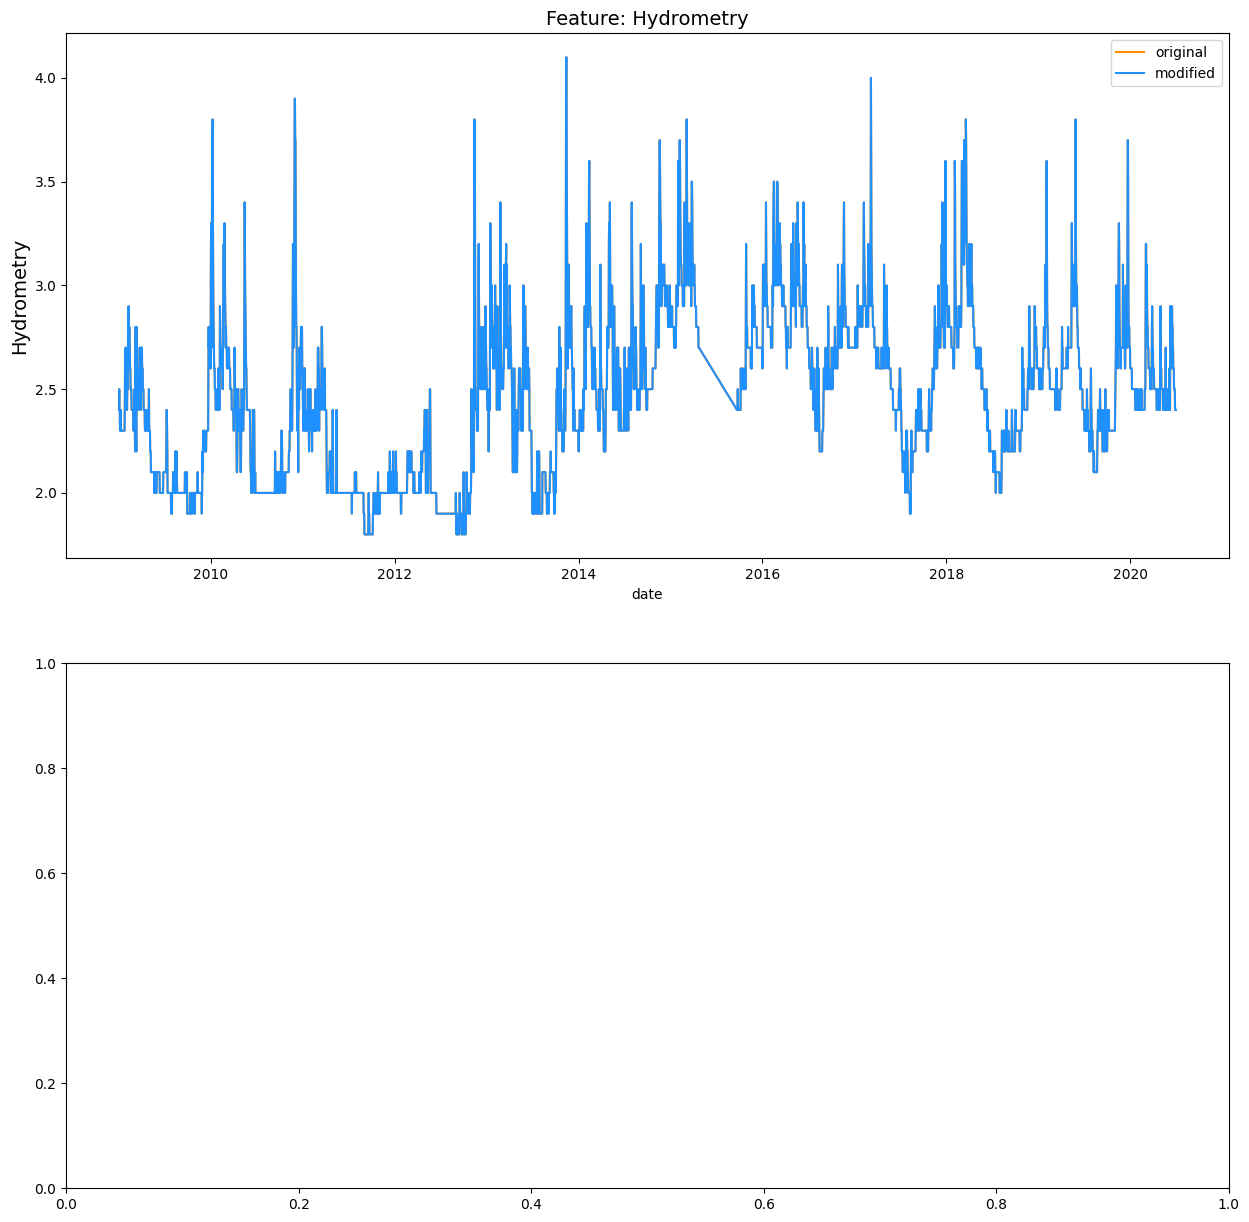

In [ ]:
# Plotting Hydrometry

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = total_data['river_hydrometry'].copy()
total_data['river_hydrometry'] = total_data['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=total_data['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=total_data['date'], y=total_data['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = total_data['drainage_volume'].copy()
total_data['drainage_volume'] = total_data['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=total_data['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

AttributeError: 'YTick' object has no attribute 'label'

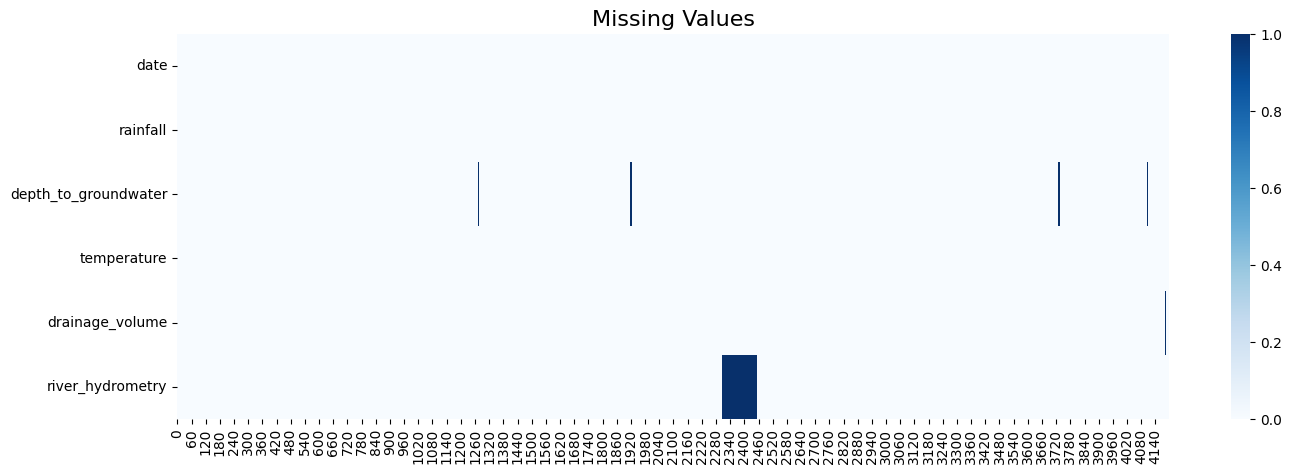

In [ ]:
# Addressing the null values
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(total_data.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

NameError: name 'date' is not defined

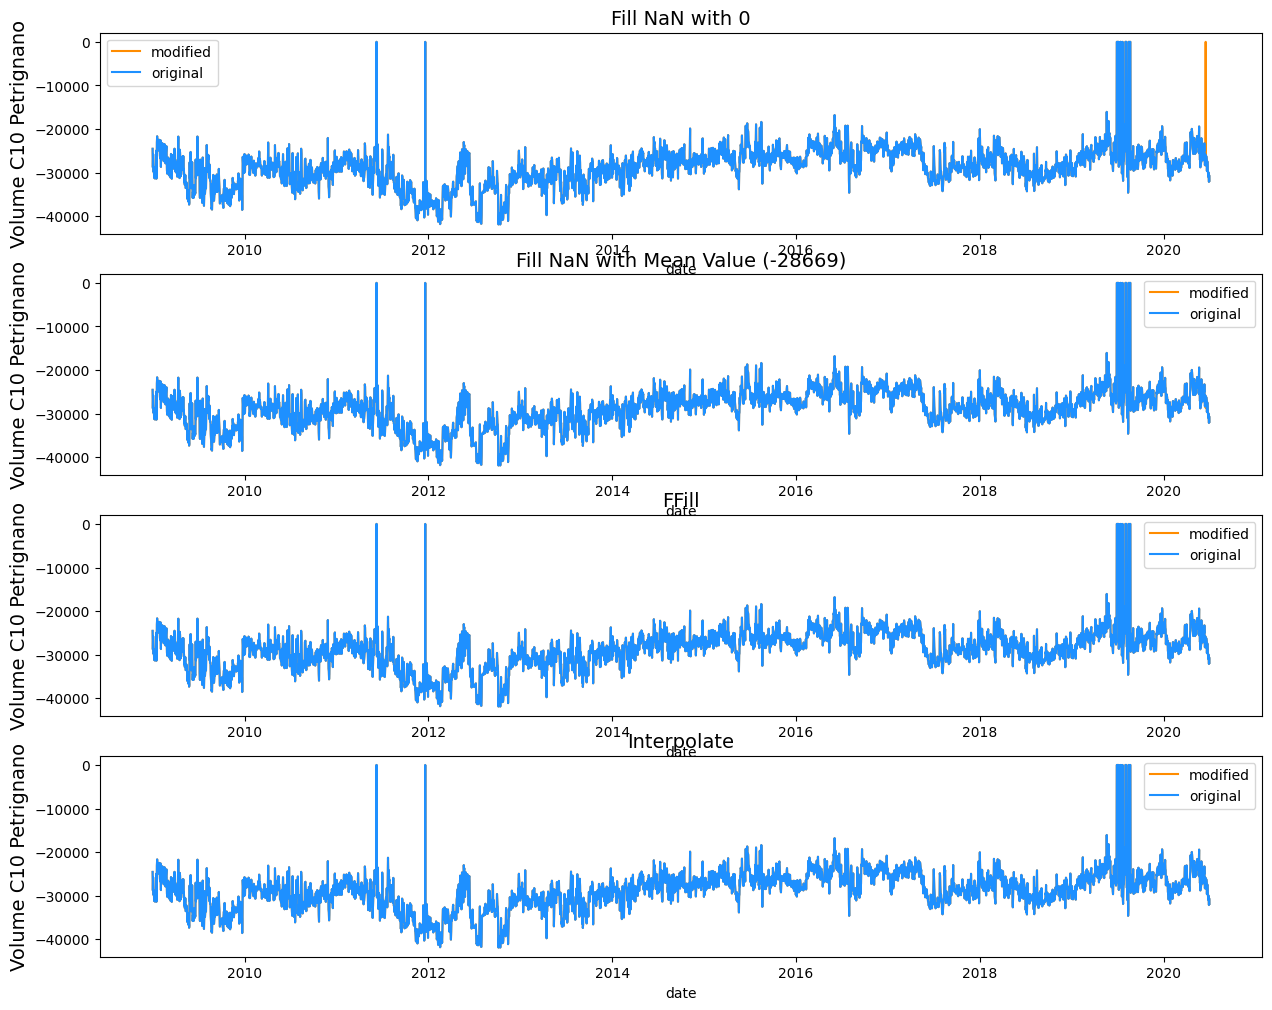

In [96]:
# Comparing the 4 different ways to handle missing values (Outlier/0, Mean value, Last Value(.ffil()), Interpolated)

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = total_data['drainage_volume'].mean()
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=total_data['date'], y=total_data['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [97]:
# Interpolating had proven to be the best option, so in columns 'drainage_volume', 'river_hydrometry', and 'depth_to_ground' we need to adjust accordingly

total_data['drainage_volume'] = total_data['drainage_volume'].interpolate()
total_data['river_hydrometry'] = total_data['river_hydrometry'].interpolate()
total_data['depth_to_groundwater'] = total_data['depth_to_groundwater'].interpolate()

In [100]:
# Running a Dickey-Fuller test to inspect the stationarity of the time series

from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['depth_to_groundwater'].values)
result

(-2.8998369955680494,
 0.04536695595343319,
 28,
 4170,
 {'1%': -3.4319191438819407,
  '5%': -2.8622333615468443,
  '10%': -2.567139082403142},
 -11587.395288114172)

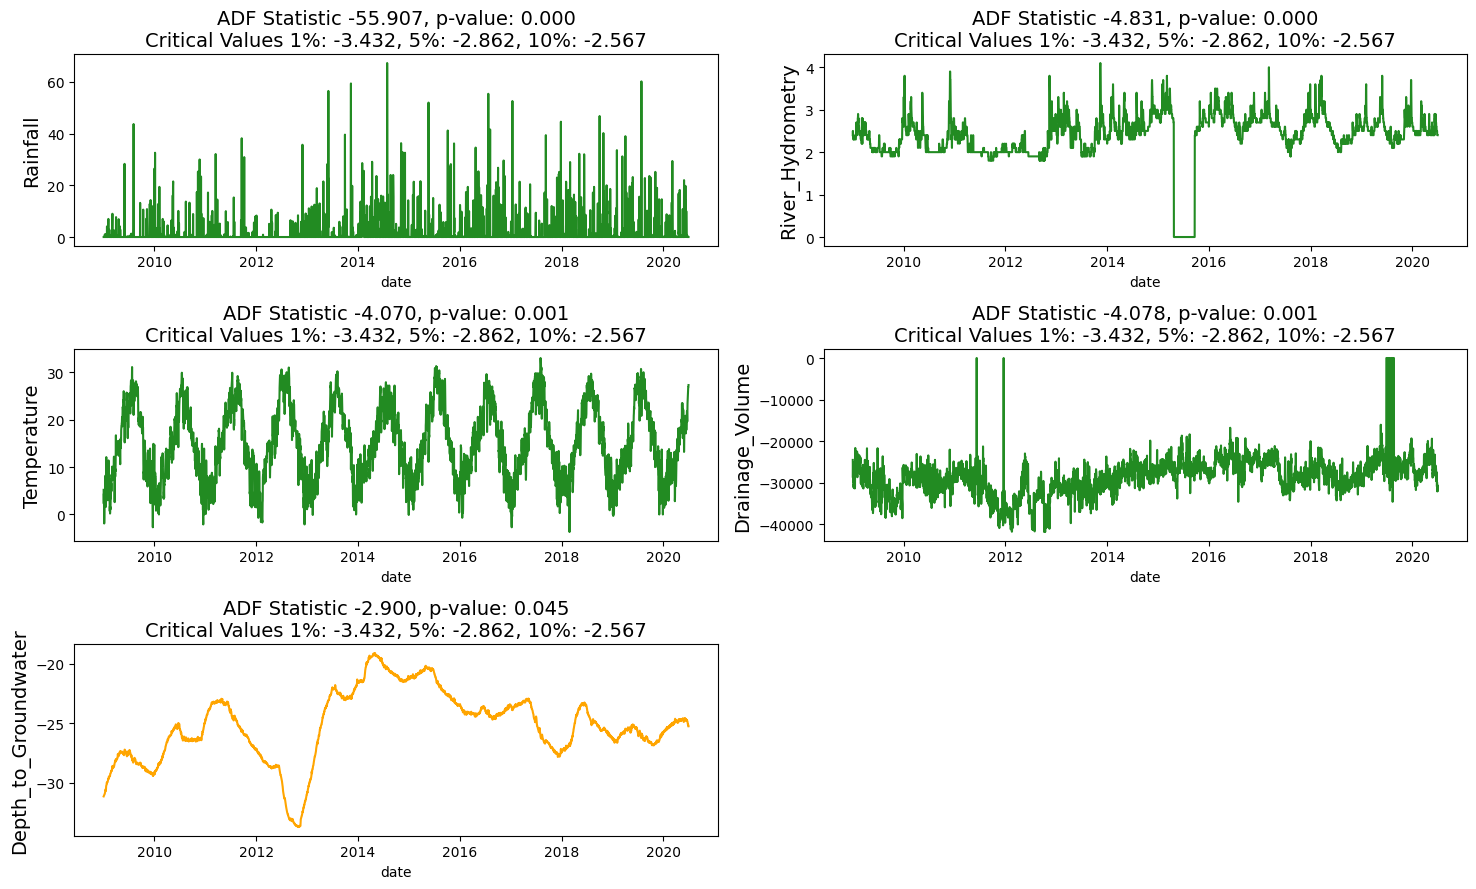

In [101]:
# Function borrowed from kaggle.com
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=total_data['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(total_data['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(total_data['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(total_data['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(total_data['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(total_data['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

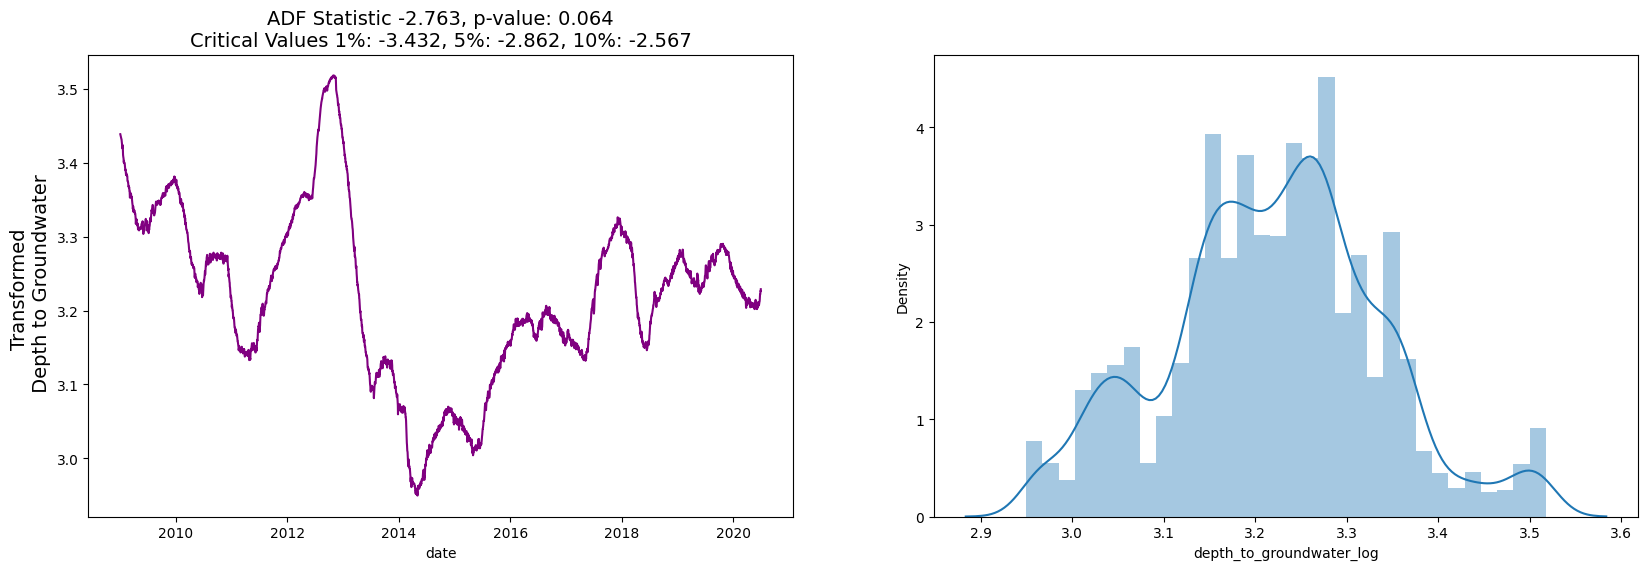

In [102]:
# Transformation using Log Transform for another way to analyse 'depth_to_groundwater'ArithmeticError

total_data['depth_to_groundwater_log'] = np.log(abs(total_data['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(total_data['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(total_data['depth_to_groundwater_log'], ax=ax[1])

Step 2: Participate in the competition

Although it is closed, you can still upload your solutions and compare yourself with the rest of the competitors in the ranking. By clicking here you can access the competition where the purpose is to predict the amount of water.

Read the information about the problem description, evaluation metrics, timeline and prizes. Once you have an overview of the competition, prepare the notebook with the code development and upload it, compare yourself with the other developers.

Follow these tips:

Look at the solutions proposed by other developers. Some use time series, others use supervised algorithms such as linear regression, decision trees, etc. Investigate which model might work best for this use case and explore all options.
Whatever model you choose, be sure to process and explore the data as studied in past modules.

Trial and error! Don't pretend to get the best model the first time, keep trying.